https://www.youtube.com/watch?v=zDwxGxiNFSo&t=2443s

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

Variable	Description
Loan_ID	Unique Loan ID
Gender	Male/ Female
Married	Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	Loan approved (Y/N) (target variable)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\DA project\\ML Project\\Loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Checking some basic Statistics

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
## We can see there are null values in the dataset
## Dependents is showing as object but there are numbers

# Preprocesssing the data

# finding the % of null values

In [7]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
# Checking for Dupplicate Records

In [9]:
data.duplicated().any()

False

# Checking for outliers before missing value imputation

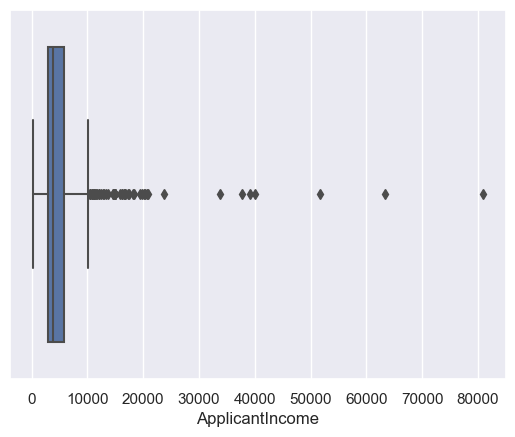

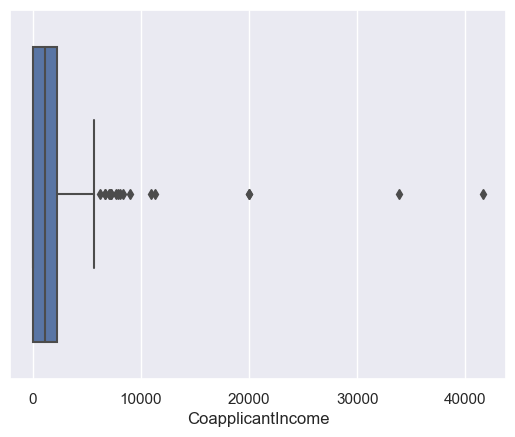

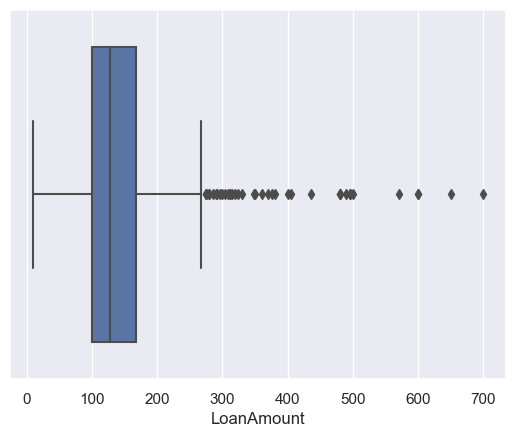

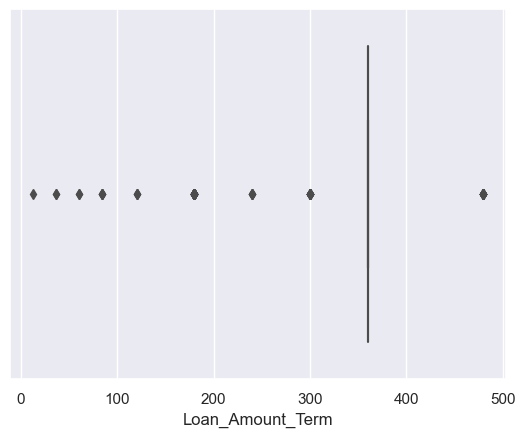

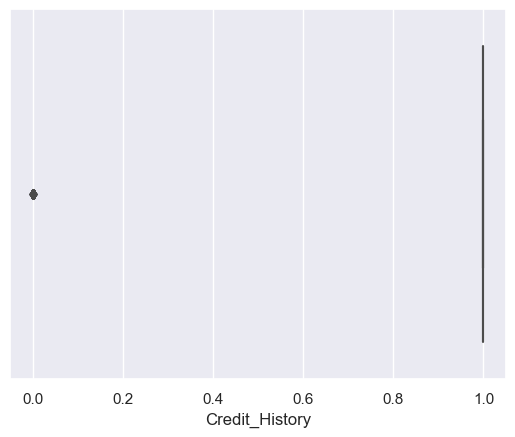

In [10]:
def boxplot(col):
    sns.boxplot(data[col])
    plt.show()
for i in list(data.select_dtypes(exclude= ["object"]).columns):
    boxplot(i)

In [11]:
# Income of applicant varies which is possible so i would considers there are no outliers

In [12]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

# Missing Value Imputation

In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing Value Imputation of Numerical Data

In [15]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mode()[0])
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].median())

In [17]:
data["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
data["LoanAmount"].value_counts()        

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

# Missing Value Imputation of Categorical Data

In [19]:
data["Gender"].mode()[0] # it returns dataframe so we input 0 to pick the value

'Male'

In [20]:
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [21]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [22]:
# Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

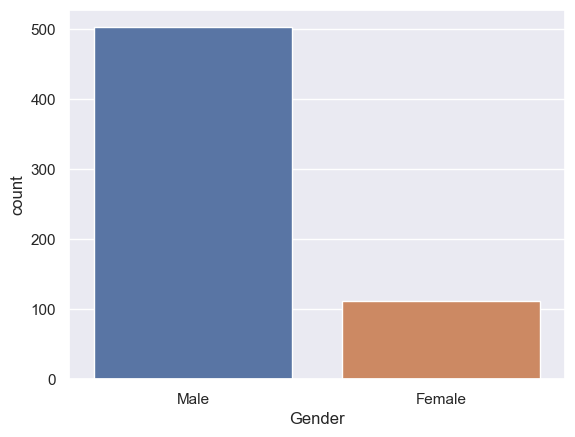

In [23]:
sns.countplot(data["Gender"])

In [24]:
    # Majority of applicants are male and small portion are female

<AxesSubplot:xlabel='Married', ylabel='count'>

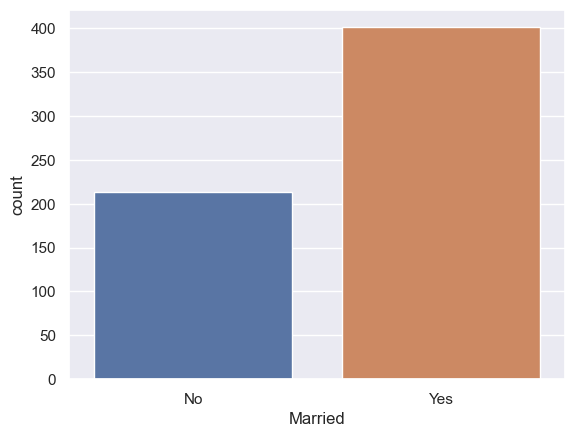

In [25]:
sns.countplot(data["Married"])


In [26]:
#Majority of applicants are married

<AxesSubplot:xlabel='Education', ylabel='count'>

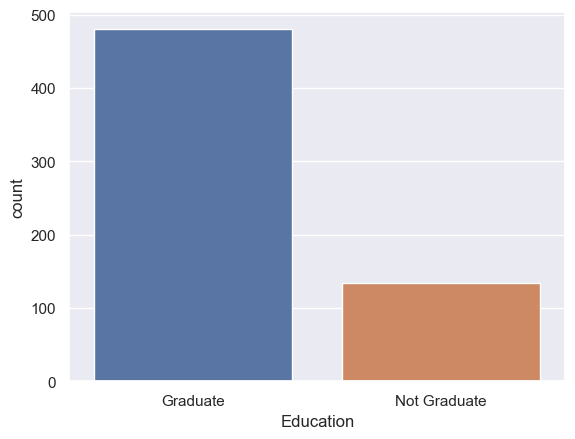

In [27]:
sns.countplot(data["Education"])

In [28]:
# Majority of applicants in the data are graduate

<AxesSubplot:ylabel='Dependents'>

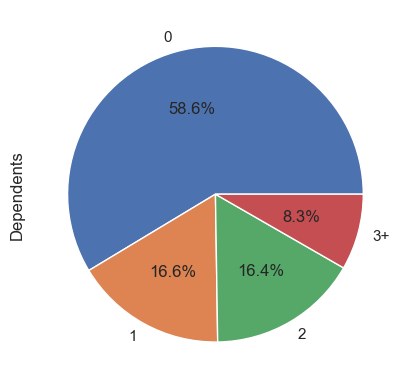

In [29]:
data["Dependents"].value_counts().plot(kind="pie",autopct = "%1.1f%%")


In [30]:
# 58.6% of Loan applicants are not having any dependents

In [31]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

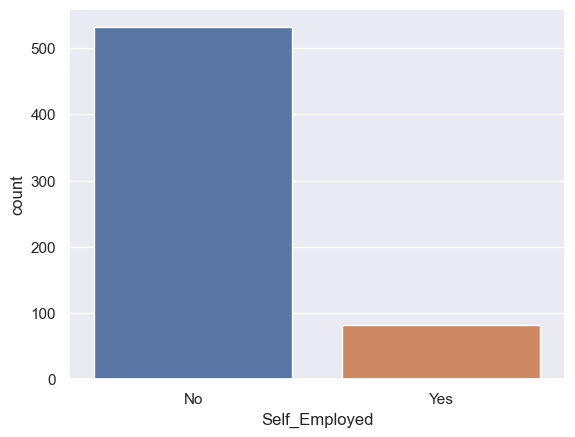

In [32]:
sns.countplot(data["Self_Employed"])

In [33]:
# Majority of applicant who have applied for loan are not self employed

<AxesSubplot:ylabel='Property_Area'>

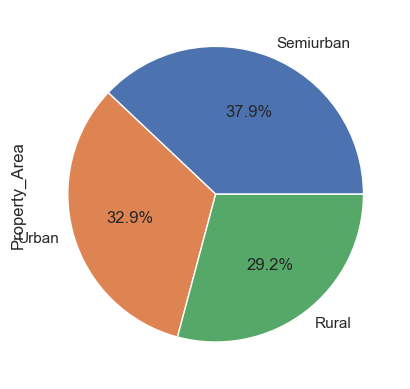

In [34]:
data["Property_Area"].value_counts().plot(kind="pie",autopct = "%1.1f%%")

In [35]:
# Around 37.9% of applicants are from Semi Urban Area

In [36]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

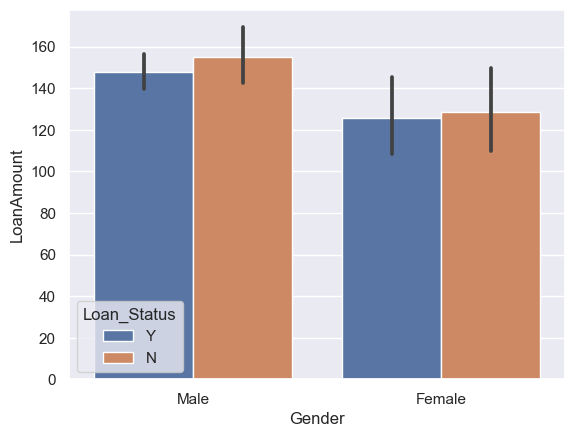

In [37]:
sns.barplot(x="Gender",y="LoanAmount", hue="Loan_Status", data=data)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

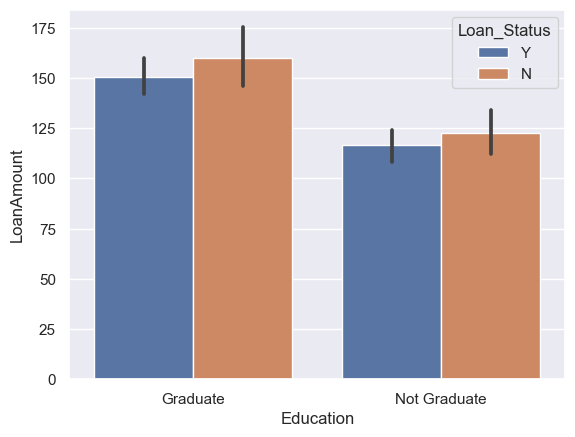

In [38]:
sns.barplot(x="Education",y="LoanAmount", hue="Loan_Status", data=data)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

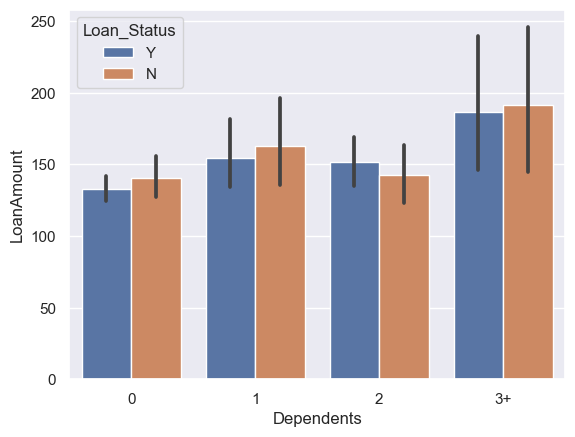

In [39]:
sns.barplot(x="Dependents",y="LoanAmount", hue="Loan_Status", data=data)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

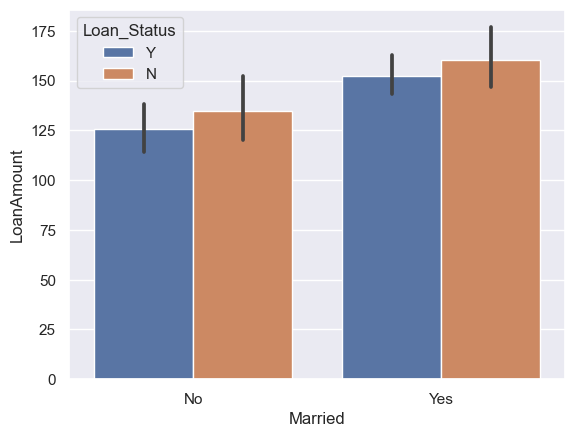

In [40]:
sns.barplot(x="Married",y="LoanAmount", hue="Loan_Status", data=data)

In [41]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

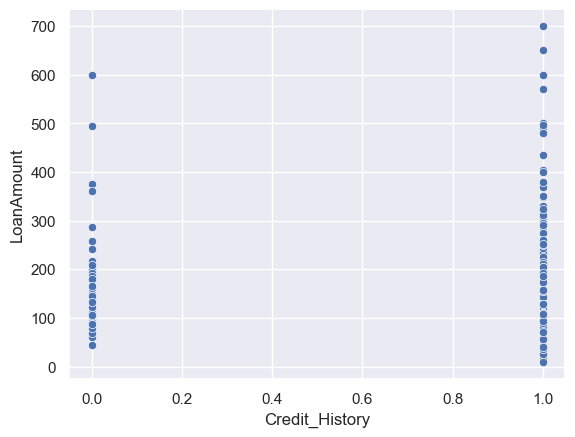

In [42]:
sns.scatterplot(x= "Credit_History", y="LoanAmount",data=data)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

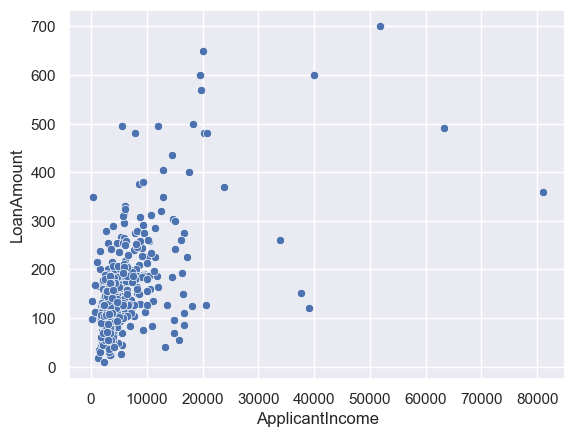

In [43]:
sns.scatterplot(x= "ApplicantIncome", y="LoanAmount",data=data)

In [44]:
# There is no correlation between applicant income and Loan amount

# Feature Construction

In [45]:
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data["Total_Income"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

# Corelation Matrix

<AxesSubplot:>

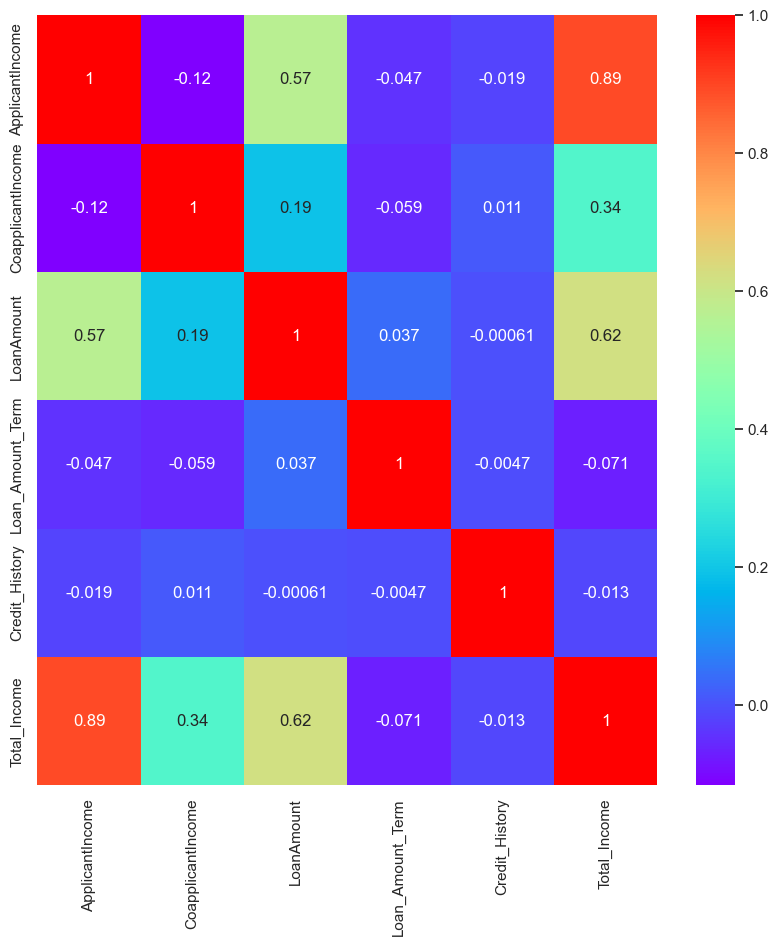

In [46]:
plt.figure(figsize=(10,10))
corr=  data.corr()
sns.heatmap(corr,annot= True,cmap = "rainbow")

In [47]:
cols = ["ApplicantIncome","CoapplicantIncome","Loan_ID"]

data=data.drop(columns=cols,axis=1)

In [48]:
# cols = ["Loan_ID"]

# data=data.drop(columns=cols,axis=1)

In [49]:
data["Dependents"]= data["Dependents"].replace(to_replace="3+",value="4").astype("int")

In [50]:
data["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

# Encoding

Label encoding  transformer should be used to encode target values, i.e. y, and not the input X.

In [51]:
data["Gender"]=data["Gender"].map({"Male":1,"Female":0}).astype("int")
data["Married"]=data["Married"].map({"Yes":1,"No":0}).astype("int")
data["Education"]=data["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
data["Self_Employed"]=data["Self_Employed"].map({"Yes":1,"No":0}).astype("int")
data["Property_Area"]=data["Property_Area"].map({"Rural":0,"Urban":1,"Semiurban":2}).astype("int")

In [52]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Label Encoding on Feature Variables

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [54]:
# data["Loan_Status"]=data["Loan_Status"].map({"Y":1,"N":0}).astype("int")

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,128.0,360.0,1.0,1,1,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,1,1,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,1,1,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,1,1,6000.0


# Split data into x and response (target) in vector y 

In [56]:
x= data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

In [57]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,1,0,128.0,360.0,1.0,1,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,0,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,1,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,1,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,1,6000.0


In [58]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [59]:
print(round(y.value_counts(normalize = True)*100),2)

1    69.0
0    31.0
Name: Loan_Status, dtype: float64 2


In [60]:
# One Hot Encoding

# x_new = pd.get_dummies(x)

In [61]:
# x_new.shape

# Spliting data into Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y, random_state=42)

print(x_train.shape)
print(x_test.shape)

(491, 10)
(123, 10)


# Feature Scaling

- It is essential for ml algo that calculate distances. if not normalised feature with higher range starts dominating when calculating distances . Distance Algo that reqiure scaling are knn,nn,svm,lineer and logistic

- Nonn distance algo DT RF adaboost,navie bayes
    

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

In [65]:
# norm = MinMaxScaler()
# x_train = norm.fit_transform(x_train)
# x_test = norm.transform(x_test)

In [66]:

sc= StandardScaler()

x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [67]:
model_df={}
def model_val(model,x_train,y_train):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model} test accuracy is {round(accuracy_score(y_test,y_pred),2)}")
    
    train_score=cross_val_score(model,x_train,y_train,cv=5)
    test_score=cross_val_score(model,x_test,y_test,cv=5)
    print(f"{model} Avg cross val training score is {np.mean(train_score)}")
    print(f"{model} Avg cross val testing score is {np.mean(test_score)}")
    model_df[model]=round(np.mean(test_score)*100,2)
    print("Average % test accuracy",model_df[model])
    print ("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    print ("Classification Report")
    print(classification_report(y_test,y_pred))
#     fpr,tpr,threshold=roc_curve(y_test,y_pred)
#     auc_curve =auc(fpr,tpr)
#     plt.plot(fpr,tpr,marker=".",label="Model(auc=%0.3f)"%auc_curve)

In [68]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [69]:
log = LogisticRegression()

model_val(log,x_train,y_train)

LogisticRegression() test accuracy is 0.85
LogisticRegression() Avg cross val training score is 0.7983714698000413
LogisticRegression() Avg cross val testing score is 0.8373333333333333
Average % test accuracy 83.73
Confusion Matrix
[[21 17]
 [ 1 84]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [70]:
log = LogisticRegression(solver ='sag', penalty= 'l2', C= 0.06359818286283781, multi_class="multinomial")

model_val(log,x_train,y_train)

LogisticRegression(C=0.0635981828628378, multi_class='multinomial',
                   solver='sag') test accuracy is 0.85
LogisticRegression(C=0.0635981828628378, multi_class='multinomial',
                   solver='sag') Avg cross val training score is 0.7983714698000413
LogisticRegression(C=0.0635981828628378, multi_class='multinomial',
                   solver='sag') Avg cross val testing score is 0.8536666666666667
Average % test accuracy 85.37
Confusion Matrix
[[21 17]
 [ 1 84]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [71]:
# SVC

In [72]:
from sklearn import svm
svc = svm.SVC()
model_val(svc,x_train,y_train)

SVC() test accuracy is 0.85
SVC() Avg cross val training score is 0.7902494331065759
SVC() Avg cross val testing score is 0.8213333333333332
Average % test accuracy 82.13
Confusion Matrix
[[20 18]
 [ 1 84]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [73]:
# Decission Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_val(dt,x_train,y_train)

DecisionTreeClassifier() test accuracy is 0.74
DecisionTreeClassifier() Avg cross val training score is 0.6578231292517007
DecisionTreeClassifier() Avg cross val testing score is 0.7483333333333334
Average % test accuracy 74.83
Confusion Matrix
[[27 11]
 [21 64]]
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        38
           1       0.85      0.75      0.80        85

    accuracy                           0.74       123
   macro avg       0.71      0.73      0.71       123
weighted avg       0.76      0.74      0.75       123



In [75]:
# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier()
model_val(rf,x_train,y_train)

RandomForestClassifier() test accuracy is 0.82
RandomForestClassifier() Avg cross val training score is 0.7596165739022881
RandomForestClassifier() Avg cross val testing score is 0.8210000000000001
Average % test accuracy 82.1
Confusion Matrix
[[23 15]
 [ 7 78]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123



In [78]:
rf=RandomForestClassifier(n_estimators=500,criterion='entropy',max_features="auto")
model_val(rf,x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=500) test accuracy is 0.82
RandomForestClassifier(criterion='entropy', n_estimators=500) Avg cross val training score is 0.7759224902082045
RandomForestClassifier(criterion='entropy', n_estimators=500) Avg cross val testing score is 0.8456666666666667
Average % test accuracy 84.57
Confusion Matrix
[[23 15]
 [ 7 78]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123



In [79]:
# Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gbc = GradientBoostingClassifier()
model_val(gbc,x_train,y_train)

GradientBoostingClassifier() test accuracy is 0.83
GradientBoostingClassifier() Avg cross val training score is 0.7576169861884148
GradientBoostingClassifier() Avg cross val testing score is 0.8293333333333333
Average % test accuracy 82.93
Confusion Matrix
[[22 16]
 [ 5 80]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.83      0.94      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123



In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
gb=GaussianNB()
model_val(gb,x_train,y_train)

GaussianNB() test accuracy is 0.85
GaussianNB() Avg cross val training score is 0.7820861678004535
GaussianNB() Avg cross val testing score is 0.8373333333333333
Average % test accuracy 83.73
Confusion Matrix
[[22 16]
 [ 2 83]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [84]:
gb=GaussianNB(var_smoothing=0.1)
model_val(gb,x_train,y_train)

GaussianNB(var_smoothing=0.1) test accuracy is 0.85
GaussianNB(var_smoothing=0.1) Avg cross val training score is 0.786147186147186
GaussianNB(var_smoothing=0.1) Avg cross val testing score is 0.8373333333333333
Average % test accuracy 83.73
Confusion Matrix
[[22 16]
 [ 2 83]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(p=8,n_jobs = 20)
model_val(knn,x_train,y_train)

KNeighborsClassifier(n_jobs=20, p=8) test accuracy is 0.85
KNeighborsClassifier(n_jobs=20, p=8) Avg cross val training score is 0.7821480107194393
KNeighborsClassifier(n_jobs=20, p=8) Avg cross val testing score is 0.8290000000000001
Average % test accuracy 82.9
Confusion Matrix
[[23 15]
 [ 3 82]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.85      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [86]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=500,learning_rate=0.01,algorithm ='SAMME')
model_val(ad,x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=500) test accuracy is 0.85
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=500) Avg cross val training score is 0.7983714698000413
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=500) Avg cross val testing score is 0.8536666666666667
Average % test accuracy 85.37
Confusion Matrix
[[21 17]
 [ 1 84]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [87]:
model_df

{LogisticRegression(): 83.73,
 LogisticRegression(C=0.0635981828628378, multi_class='multinomial',
                    solver='sag'): 85.37,
 SVC(): 82.13,
 DecisionTreeClassifier(): 74.83,
 RandomForestClassifier(): 82.1,
 RandomForestClassifier(criterion='entropy', n_estimators=500): 84.57,
 GradientBoostingClassifier(): 82.93,
 GaussianNB(): 83.73,
 GaussianNB(var_smoothing=0.1): 83.73,
 KNeighborsClassifier(n_jobs=20, p=8): 82.9,
 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=500): 85.37}



# Hyperparameter Tuning

- in ml there are two types of parameters:
    
- Model Param : model learns this parameters during training phase. these are model  parameters eg linear y=mx+c so it learns these params
    
- hyper param : These are adjustable para that must be tuned to obtain optimal results. To find best results using search cv

In [157]:
# from sklearn.model_selection import GridSearchCV

# param = {"var_smoothing":np.logspace(0,-9,num=100)}
# grid_search=GridSearchCV(estimator=GaussianNB(),param_grid=param,n_jobs =-1,cv=10,scoring="accuracy")
# grid_search.fit(x_train,y_train)

In [154]:
# grid_scores = grid_search.cv_results_
# grid_scores

In [153]:
# pd.DataFrame(grid_scores)

In [155]:
#grid_search.best_params_

In [156]:
# LogisticRegression().get_params()

In [97]:
# from sklearn.model_selection import RandomizedSearchCV

# log_reg={"C":np.logspace(-4,4,20),
#         "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
#          "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#          "multi_class" : ['auto', 'ovr', 'multinomial']
#         }

# Log_rs= RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg,n_iter=20, cv=5,verbose=True)
# Log_rs.fit(x_train,y_train)

In [100]:
# Log_rs.best_score_

0.8003916718202433

In [101]:
# Log_rs.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'multi_class': 'auto',
 'C': 3792.690190732246}

# AdaBoost

In [151]:
# params = {"n_estimators": [int(x)for x in np.linspace(start=200,stop = 2000,num=10)],
#             "learning_rate":[0.0001,0.001,0.01,0.1,1.0],
#             "algorithm" : ['SAMME', 'SAMME.R'],
#             "random_state":[None,1,23,45,67,78,87]
#          }
    
# adboost = AdaBoostClassifier()
# rscv = RandomizedSearchCV(estimator=adboost,
#                          param_distributions=params,
#                          n_iter = 25,
#                          cv=5,
#                          verbose=1)

# rscv.fit(x_train,y_train)
# y_pred_tuned= rscv.predict(x_test)

In [152]:
# rscv.best_params_

# Balancing the Imbalanced Data

- The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
- We will apply imbalanced data handling techniques and see their accuracy and recall results.

In [106]:
print(round(y.value_counts(normalize = True)*100),2)

1    69.0
0    31.0
Name: Loan_Status, dtype: float64 2


In [108]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
x_res,y_res= sm.fit_resample(x,y)

print(x.shape)
y.shape

(614, 10)


(614,)

In [109]:
y_res.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=43)

print(x_train.shape)
print(x_test.shape)

(675, 10)
(169, 10)


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

In [112]:
sc= StandardScaler()

x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [113]:
model_df={}
def model_val(model,x_train,y_train):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model} test accuracy is {round(accuracy_score(y_test,y_pred),2)}")

    
    train_score=cross_val_score(model,x_train,y_train,cv=10)
    test_score=cross_val_score(model,x_test,y_test,cv=5)
    print(f"{model} Avg cross val training score is {np.mean(train_score)}")
    print(f"{model} Avg cross val testing score is {np.mean(test_score)}")
    model_df[model]=round(np.mean(test_score)*100,2)
    print("Average % test accuracy",model_df[model])
    print ("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    print ("Classification Report")
    print(classification_report(y_test,y_pred))

In [114]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

model_val(log,x_train,y_train)

LogisticRegression() test accuracy is 0.82
LogisticRegression() Avg cross val training score is 0.7793020193151887
LogisticRegression() Avg cross val testing score is 0.7877005347593583
Average % test accuracy 78.77
Confusion Matrix
[[63 22]
 [ 9 75]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        85
           1       0.77      0.89      0.83        84

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169



In [115]:
from sklearn import svm
svc = svm.SVC()
model_val(svc,x_train,y_train)

SVC() test accuracy is 0.82
SVC() Avg cross val training score is 0.7939640035118524
SVC() Avg cross val testing score is 0.7932263814616756
Average % test accuracy 79.32
Confusion Matrix
[[62 23]
 [ 8 76]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        85
           1       0.77      0.90      0.83        84

    accuracy                           0.82       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169



In [117]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_val(rf,x_train,y_train)

RandomForestClassifier() test accuracy is 0.83
RandomForestClassifier() Avg cross val training score is 0.8294995610184372
RandomForestClassifier() Avg cross val testing score is 0.7928698752228163
Average % test accuracy 79.29
Confusion Matrix
[[69 16]
 [13 71]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        85
           1       0.82      0.85      0.83        84

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_val(gbc,x_train,y_train)

GradientBoostingClassifier() test accuracy is 0.81
GradientBoostingClassifier() Avg cross val training score is 0.825153643546971
GradientBoostingClassifier() Avg cross val testing score is 0.8404634581105169
Average % test accuracy 84.05
Confusion Matrix
[[63 22]
 [10 74]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        85
           1       0.77      0.88      0.82        84

    accuracy                           0.81       169
   macro avg       0.82      0.81      0.81       169
weighted avg       0.82      0.81      0.81       169



In [150]:
from xgboost import XGBClassifier

xgb = XGBClassifier(subsample=0.5,n_estimators= 500, max_depth=10, learning_rate=0.01,colsample_bytree = 0.90, colsample_bylevel= 0.4)
model_val(xgb,x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) test accuracy is 0.85
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_

In [132]:
model_df

{LogisticRegression(): 78.77,
 SVC(): 79.32,
 DecisionTreeClassifier(): 79.91,
 RandomForestClassifier(): 79.29,
 GradientBoostingClassifier(): 84.05,
 GaussianNB(): 81.69,
 GaussianNB(var_smoothing=0.1): 79.93,
 KNeighborsClassifier(n_jobs=20, p=8): 75.78,
 KNeighborsClassifier(n_jobs=20, p=6): 75.78,
 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=500): 79.32,
 AdaBoostClassifier(): 75.19,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_ch

# Hyperparameter for XGBClassifier

In [136]:
params ={"max_depth":[3,5,6,10,15,20],
        "learning_rate":[0.01,0.1,0.2,0.3],
        'subsample':np.arange(0.5,1.0,0.1),
        "colsample_bytree":np.arange(0.4,1.0,0.1),
        "colsample_bylevel":np.arange(0.4,1.0,0.1),
        "n_estimators":[100,500,1000]}

xgbr = XGBClassifier()
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring = "neg_mean_squared_error",
                         n_iter = 25,
                         cv=5,
                         verbose=1)

rscv.fit(x_train,y_train)
y_pred_tuned_xgb= rscv.predict(x_test)

print("Best Parameters:",rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.4}
